In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np


In [8]:
df=pd.read_csv("loan_train.csv")
test=pd.read_csv("loan_test.csv")

In [9]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
df['Loan_Status'] = df.Loan_Status.map({'Y': 1, 'N': 0}).astype(int)

In [14]:
#Gender Encoding
df= df.replace({"Gender":{"Male":1, "Female":0 }})

#Married Encoding
df =df.replace({"Married" :{"Yes":1, "No":0}})

#Replace the 3+ in dependents ande make the column numeric
df['Dependents'] = df['Dependents'].replace('3+', '3')
df['Dependents']=pd.to_numeric(df['Dependents'], errors='coerce')

#Count the quantity of values on the column
df['Self_Employed'].value_counts()
df= df.replace({"Self_Employed":{"Yes":1, "No":0 }})

#Education Encoding
df['Education'].value_counts()
df= df.replace({"Education":{"Graduate":1, "Not Graduate":0 }})

# Drop the Loan ID column
df = df.drop(columns=['Loan_ID'])

#Property Area Encoding
df['Property_Area'].value_counts()
df['Property_Area'] = df['Property_Area'].map({'Rural': 0, 'Urban': 1, 'Semiurban': 2})

print(df)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0      0.0         0.0          1            0.0             5849   
1       1.0      1.0         1.0          1            0.0             4583   
2       1.0      1.0         0.0          1            1.0             3000   
3       1.0      1.0         0.0          0            0.0             2583   
4       1.0      0.0         0.0          1            0.0             6000   
..      ...      ...         ...        ...            ...              ...   
609     0.0      0.0         0.0          1            0.0             2900   
610     1.0      1.0         3.0          1            0.0             4106   
611     1.0      1.0         1.0          1            0.0             8072   
612     1.0      1.0         2.0          1            0.0             7583   
613     0.0      0.0         0.0          1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [15]:
df.fillna(df.median(), inplace=True)
columns = df.columns
for column in columns:
  df[column] = pd.to_numeric(df[column], errors='coerce')

In [18]:
col_names= df.columns.tolist()
for column in col_names:
  print("Values Null in <{0}>: <{1}>".format(column,df[column].isnull().sum()))

Values Null in <Gender>: <0>
Values Null in <Married>: <0>
Values Null in <Dependents>: <0>
Values Null in <Education>: <0>
Values Null in <Self_Employed>: <0>
Values Null in <ApplicantIncome>: <0>
Values Null in <CoapplicantIncome>: <0>
Values Null in <LoanAmount>: <0>
Values Null in <Loan_Amount_Term>: <0>
Values Null in <Credit_History>: <0>
Values Null in <Property_Area>: <0>
Values Null in <Loan_Status>: <0>


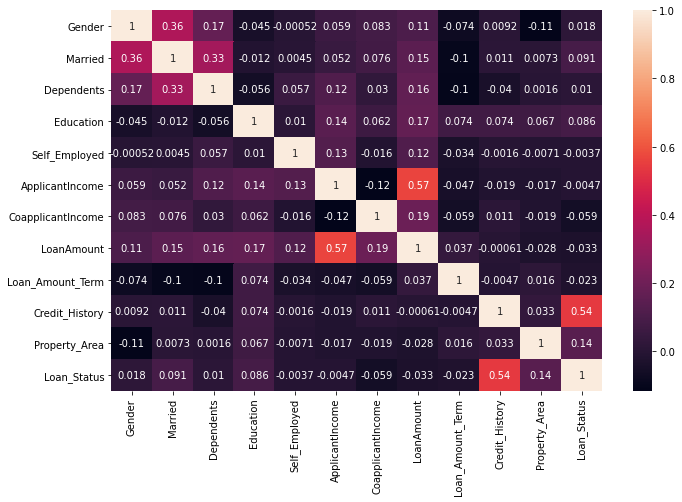

In [19]:
plt.figure(figsize=(11,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [20]:
def correlationdrop(df, sl):
  columns = df.columns
  for column in columns:
      C=abs(df[column].corr(df['Loan_Status']))
      if C < sl:
        df=df.drop(columns=[column])
  return df

df= correlationdrop(df,0.05)

print(df)

     Married  Education  CoapplicantIncome  Credit_History  Property_Area  \
0        0.0          1                0.0             1.0              1   
1        1.0          1             1508.0             1.0              0   
2        1.0          1                0.0             1.0              1   
3        1.0          0             2358.0             1.0              1   
4        0.0          1                0.0             1.0              1   
..       ...        ...                ...             ...            ...   
609      0.0          1                0.0             1.0              0   
610      1.0          1                0.0             1.0              0   
611      1.0          1              240.0             1.0              1   
612      1.0          1                0.0             1.0              1   
613      0.0          1                0.0             0.0              2   

     Loan_Status  
0              1  
1              0  
2              1  

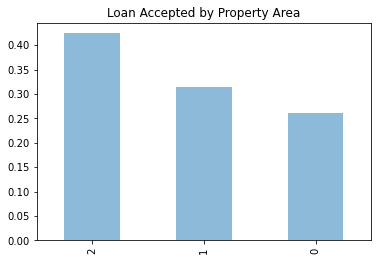

In [21]:

df.Property_Area[df.Loan_Status==1].value_counts(normalize = True).plot(kind='bar', alpha = 0.5)
plt.title('Loan Accepted by Property Area')
plt.show()

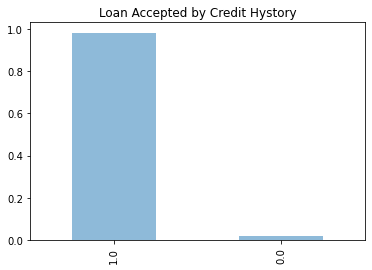

In [22]:
df.Credit_History[df.Loan_Status==1].value_counts(normalize = True).plot(kind='bar', alpha = 0.5)
plt.title('Loan Accepted by Credit Hystory')
plt.show()

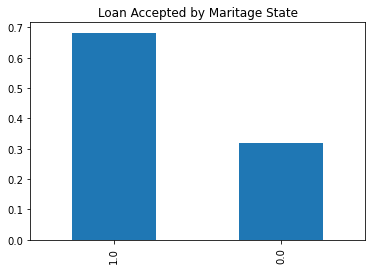

In [23]:

df.Married[df.Loan_Status==1].value_counts(normalize = True).plot(kind = 'bar')
plt.title('Loan Accepted by Maritage State')
plt.show()

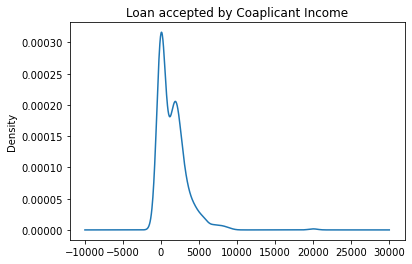

In [24]:
df.CoapplicantIncome[df.Loan_Status==1].plot(kind='kde')
plt.title('Loan accepted by Coaplicant Income')
plt.show()

In [27]:

# Choose the dependent and independent columns**


x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [28]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X= sc.fit_transform(x)

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 0)

In [30]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma= 0.2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[14 19]
 [ 2 88]]
Accuracy: 80.44 %
Standard Deviation: 4.59 %
